In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from chemdraw.mpl_rdkit_utils import draw_mol_mpl, get_mol_from_strings, _pcp_get_compound
from matplotlib import pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdmolops

[12:36:43] WARNING: not removing hydrogen atom without neighbors


NAD C1=CC(=C[N+](=C1)[C@H]2[C@@H]([C@@H]([C@H](O2)COP(=O)([O-])OP(=O)(O)OC[C@@H]3[C@H]([C@H]([C@@H](O3)N4C=NC5=C(N=CN=C54)N)O)O)O)O)C(=O)N
NADH+H+ C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2)COP(=O)([O-])OP(=O)([O-])OC[C@@H]3[C@H]([C@H]([C@@H](O3)N4C=NC5=C(N=CN=C54)N)O)O)O)O
FAD CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]([C@@H]([C@@H](COP(=O)(O)OP(=O)(O)OC[C@@H]4[C@H]([C@H]([C@@H](O4)N5C=NC6=C(N=CN=C65)N)O)O)O)O)O
FADH2 CC1=CC2=C(C=C1C)N(C3=C(N2)C(=O)NC(=O)N3)C[C@@H]([C@@H]([C@@H](COP(=O)(O)OP(=O)(O)OC[C@@H]4[C@H]([C@H]([C@@H](O4)N5C=NC6=C(N=CN=C65)N)O)O)O)O)O
Lactate CC(C(=O)[O-])O
Pyruvate CC(=O)C(=O)[O-]
Fumarate C(=C/C(=O)[O-])\C(=O)[O-]
Succinate C(CC(=O)[O-])C(=O)[O-]
Acetyl-CoA CC(=O)SCCNC(=O)CCNC(=O)[C@@H](C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@@H]1[C@H]([C@H]([C@@H](O1)N2C=NC3=C(N=CN=C32)N)O)OP(=O)(O)O)O


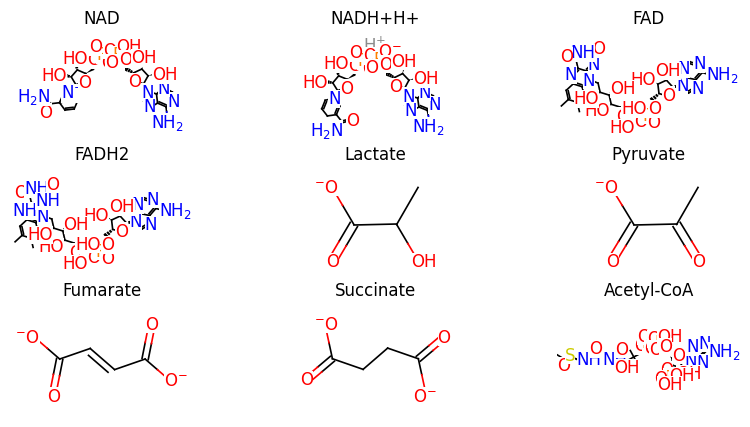

In [22]:
cnames = [
    "NAD",
    "NADH+H+",
    "FAD",
    "FADH2",
    "Lactate",
    "Pyruvate",
    # "alpha-ketoglutarate",
    "Fumarate",
    'Succinate',
    'Acetyl-CoA',
    'Oxaloacetate',
]
mols = get_mol_from_strings(cnames)
# mols[7] = Chem.MolFromSmiles("CC(=O)S|LP:3|")
mols[1] = Chem.MolFromSmiles("C1C=CN(C=C1C(=O)N)[C@H]2[C@@H]([C@@H]([C@H](O2)COP(=O)([O-].[H+])OP(=O)([O-])OC[C@@H]3[C@H]([C@H]([C@@H](O3)N4C=NC5=C(N=CN=C54)N)O)O)O)O")
fig, ax = plt.subplots(3, 3, figsize=(10, 5))

for m, a, cname in zip(mols, ax.flatten(), cnames):
    print(cname, _pcp_get_compound(cname).isomeric_smiles)
    draw_mol_mpl(
        m,
        fig,
        a,
        style='golden',
        kekulize=True,
        wedge_bonds=True,
        fit_image=False,
    )
    a.set_title(cname)
# "Acetyl-CoA": "CC(=O)SCCNC(=O)CCNC(=O)[C@@H](C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@@H]1[C@H]([C@H]([C@@H](O1)N2C=NC3=C(N=CN=C32)N)O)OP(=O)(O)O)O"

plt.show()
plt.close()

In [39]:
cnames = [
    # 'Acetaldehyde',
    # 'Acetyl-CoA',
    # 'Acetate',
    # 'Alpha-ketoglutarate',
    # 'Ethanol',
    # 'FAD',
    # 'FADH2',
    # 'Fumarate',
    # 'Lactate',
    # 'NAD',
    # 'NADH+H+',
    # 'Oxaloacetate',
    # 'Pyruvate',
    # 'Propionate',
    # 'Propionyl-CoA',
    # 'Methylmalonyl-CoA',
    # 'Succinyl-CoA',
    # 'Succinate',
    # 'Menaquinone-2',
    # 'Menaquinol',
    # 'Isocitrate',
    # 'Oxaloacetate',
    # 'Citrate',
    # 'Oxalosuccinate',
    # 'Carbondioxide',
    'Malate',

]
for c in cnames:
    compound = get_mol_from_strings([c])[0]
    max_len = 0
    for i in range(0, compound.GetNumAtoms()):
        for k in range(0, compound.GetNumAtoms()):
            if i == k:
                continue
            d = len(rdmolops.GetShortestPath(compound, i, k))
            if d > max_len:
                max_len = i
    print(c, compound.GetNumAtoms(), max_len, _pcp_get_compound(c).isomeric_smiles)
    fig, ax = plt.subplots(1, 1, figsize=(10/3 * max_len/6, 5/3  * max_len/6))
    draw_mol_mpl(
        compound,
        fig,
        ax,
        style='golden',
        kekulize=True,
        wedge_bonds=True,
        fit_image=False,
    )
    ax.set_title(c)
    plt.savefig(f'./data/{c}.svg', dpi=100, bbox_inches='tight', transparent=True, )
    plt.close()


Malate 9 7 C(C(C(=O)[O-])O)C(=O)[O-]


In [31]:
a = 'Vitamin K2'
print(_pcp_get_compound(a).isomeric_smiles)
# CC1=C(C2=CC=CC=C2C(=C1C/C=C(\C)/CCC=C(C)C)O)O
# CC1=C(C(=O)C2=CC=CC=C2C1=O)C/C=C(\C)/CC/C=C(\C)/CC/C=C(\C)/CCC=C(C)C
#

CC1=C(C(=O)C2=CC=CC=C2C1=O)C/C=C(\C)/CC/C=C(\C)/CC/C=C(\C)/CCC=C(C)C
